In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Przygotowanie danych

In [2]:
# Wczytanie danych
df = pd.read_csv('files/dataset.csv')
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Przekształcenie daty na format datowy
df['Date'] = pd.to_datetime(df['Date'])

# Ustawienie indeksu daty
df.set_index('Date', inplace=True)
df.head()

,Unemployed,Gold (Close),USD (Close),Oil (Close),Tourists,Cars,ImportExport,IndustryProd,CommerceInvest,Inflation
Date,,,,,,,,,,
2011-02-01,2150233.0,1339.599976,2.8199,101.739998,1232497.0,67610.0,110.28,110.5,13.7,3.6
2011-03-01,2133916.0,1430.699951,2.8954,115.419998,1449978.0,67610.0,112.79,106.2,15.1,4.3
2011-04-01,2043516.0,1428.099976,2.8224,118.699997,1510034.0,69213.0,111.05,106.5,19.3,4.5
2011-05-01,1962587.0,1485.250000,2.7942,116.614998,2006688.0,69213.0,106.81,107.9,17.0,5.0
2011-06-01,1883299.0,1542.400024,2.7660,114.529999,2254963.0,69213.0,105.07,102.5,20.0,4.2


### Zmienne

| Zmienna | Opis                                                                                          | Jednostka          |
|------------|-----------------------------------------------------------------------------------------------|--------------------|
| Unemployed| Bezrobotni zarejestrowani w Polsce                                                            | osoba              |
| Gold (Close)| Kurs złota wyrażony poprzez kurs zamknięcia                                                   | USD                |
| USD (Close)| Kurs walutowy USD/PLN wyrażony poprzez kurs zamknęcia                                         | PLN                |
| Oil (Close)| Kurs ropy brentowej wyrażony poprzez kurs zamknięcia                                          | USD                |
| Tourists| Liczba osób korzystających z obiektów noclegowych posiadających 10 lub więcej miejsc noclegowych | osoba              |
| Cars| Pojazdy samochodowe fabrycznie nowe zarejestrowane po raz pierwszy na terytorium Polski       | sztuka             |
| ImportExport| Średnia wartość importu i eksportu dla różnych działów produktów wyrażona w stosunku do analogicznego okresu z roku poprzedniego | Index (RP[^1]=100) |
| IndustryProd| Produkcja sprzedana przemysłu/Wartość wyrobów przemysłowych, które zostały wyprodukowane i sprzedane wyrażona w stosunku do analogicznego okresu z roku poprzedniego| Index (RP[^1]=100) |
| CommerceInvest| Średnie przewidywane nakłady inwestycyjne w różnych sektorach handlu | mln PLN            |
| Inflation| Wskaźnik cen towarów i usług konsumpcyjnych w stosunku do analogicznego miesiąca poprzedniego roku | %                  |

[^1]: RP  - Rok Poprzedni

# Analiza wstępna

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="whitegrid")

### Wizualizacja danych

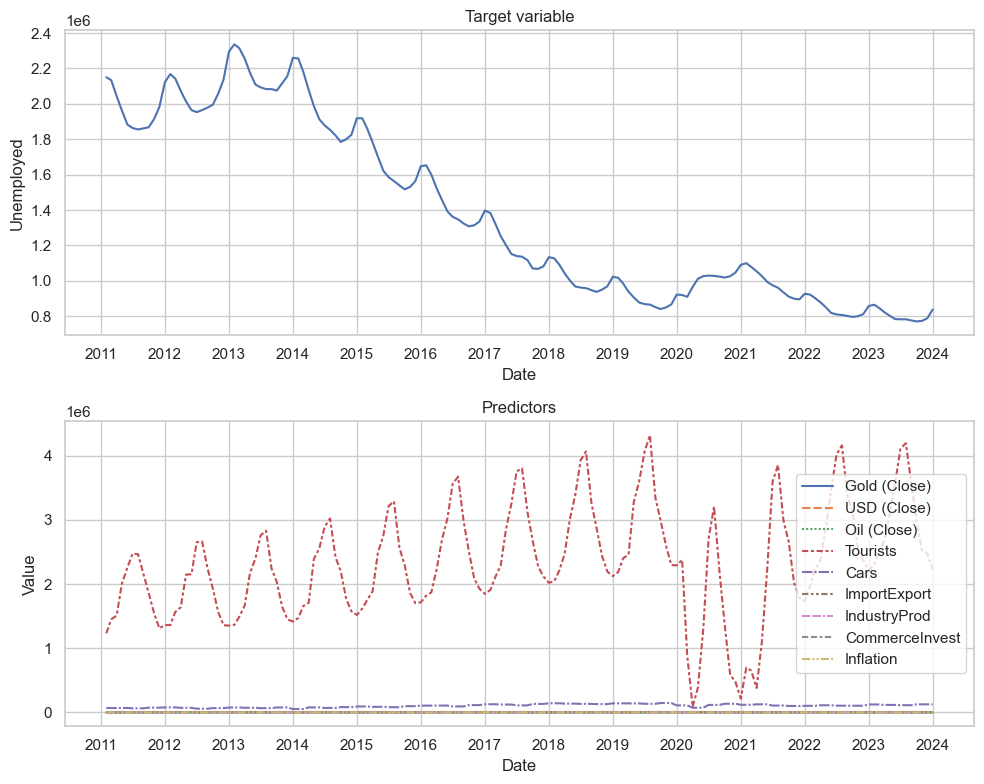

In [4]:
# Wizualizacja danych, aby zrozumieć podstawowe wzorce i trendy
fig, ax = plt.subplots(2,1, figsize=[10, 8])
sns.lineplot(df['Unemployed'], ax=ax[0])
sns.lineplot(df.drop('Unemployed', axis=1), ax=ax[1])

years = mdates.YearLocator()
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_ylabel('Value')
ax[0].set_title('Target variable')
ax[1].set_title('Predictors')

plt.tight_layout()
plt.show()

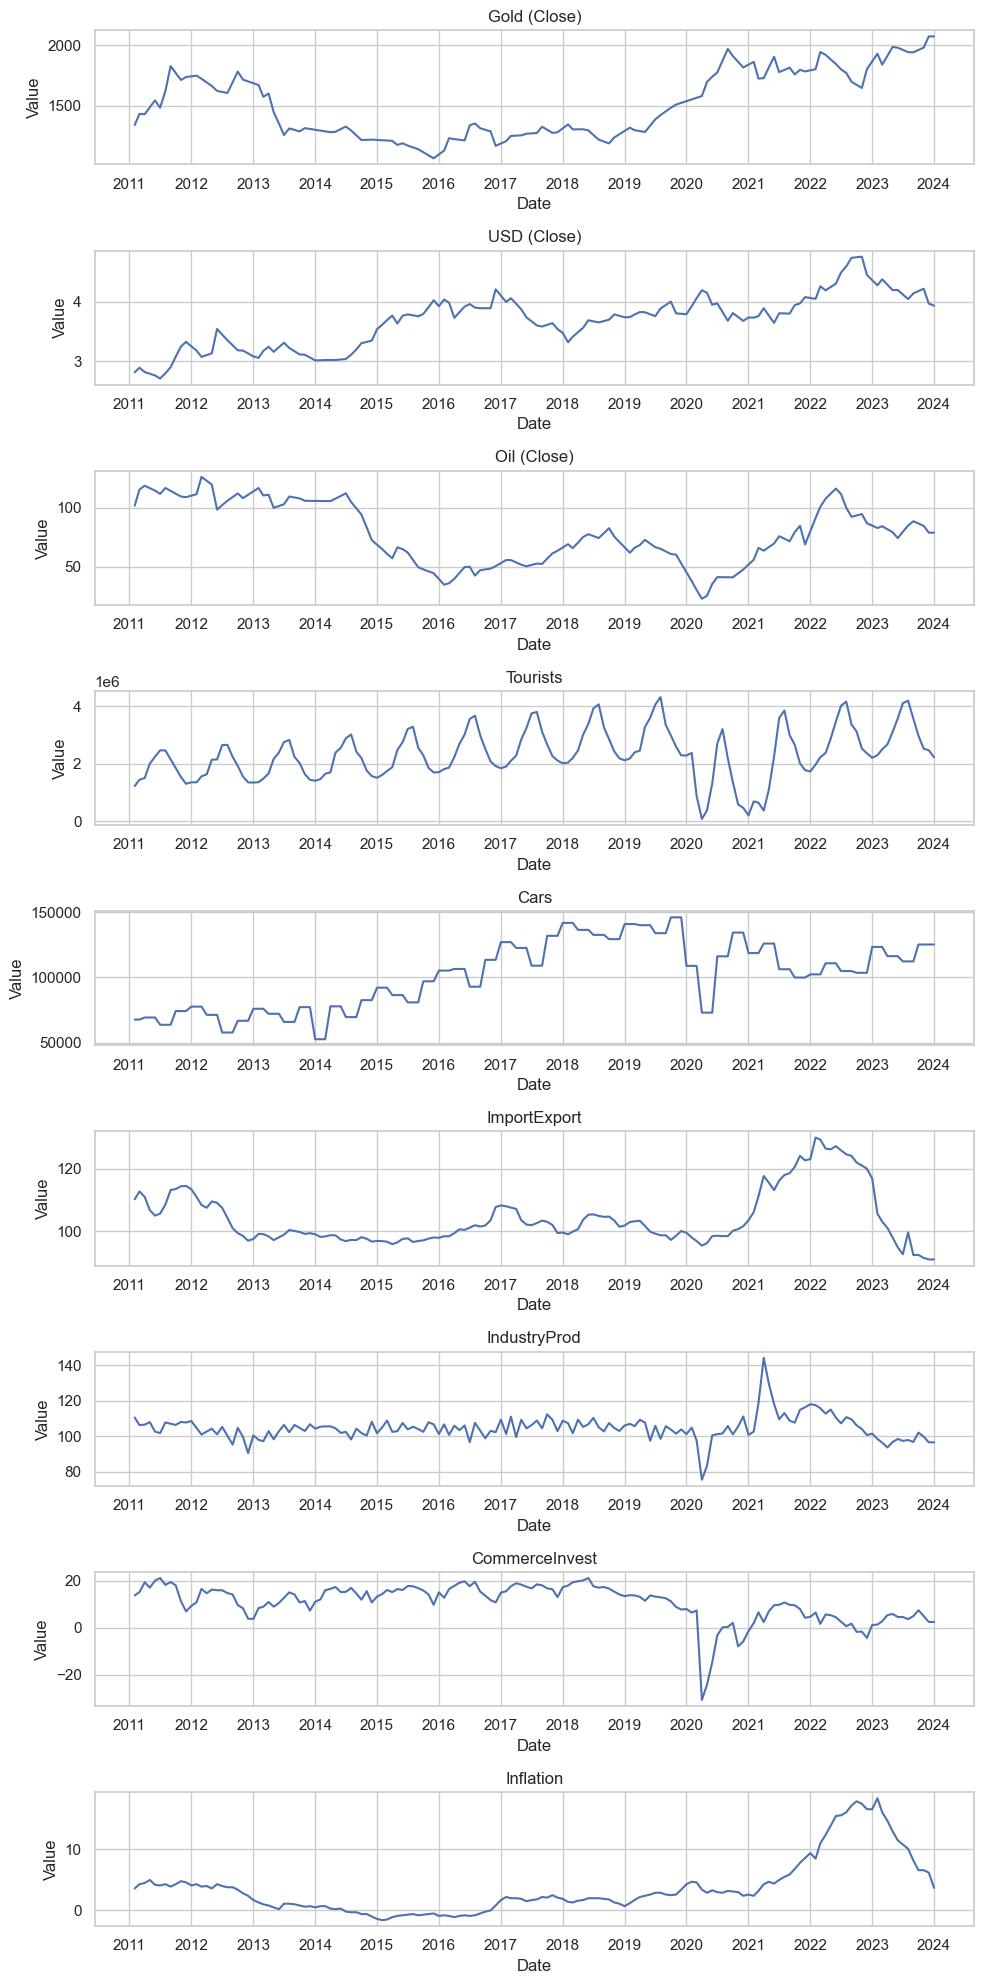

In [5]:
cols = list(df.columns.drop('Unemployed'))

fig, ax = plt.subplots(len(cols),1, figsize=[10, 20])

for i, col in enumerate(cols):
    sns.lineplot(df[col], ax=ax[i])

    years = mdates.YearLocator()
    ax[i].xaxis.set_major_locator(years)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    ax[i].set_ylabel('Value')
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [6]:
df.describe()

,Unemployed,Gold (Close),USD (Close),Oil (Close),Tourists,Cars,ImportExport,IndustryProd,CommerceInvest,Inflation
count,1.560000e+02,156.000000,156.000000,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1.377866e+06,1507.458014,3.675339,77.875192,2.325535e+06,101711.730769,104.214038,104.639103,10.550641,3.665385
std,5.043236e+05,274.202333,0.444954,26.037675,8.656406e+05,25988.392426,8.755217,6.870870,7.948370,4.648908
min,7.704460e+05,1063.800049,2.714000,22.760000,8.638600e+04,52522.000000,91.060000,75.400000,-30.800000,-1.600000
25%,9.327835e+05,1277.625031,3.298413,55.753750,1.746958e+06,77176.000000,98.425000,101.200000,6.400000,0.700000
50%,1.138056e+06,1438.500000,3.758650,75.334999,2.264302e+06,105236.000000,101.085000,104.500000,12.700000,2.400000
75%,1.879715e+06,1768.625000,3.964137,105.634503,2.866874e+06,125273.000000,107.672500,107.525000,16.325000,4.300000
max,2.336686e+06,2071.000000,4.757700,126.199997,4.319590e+06,146113.000000,130.000000,144.200000,21.100000,18.400000


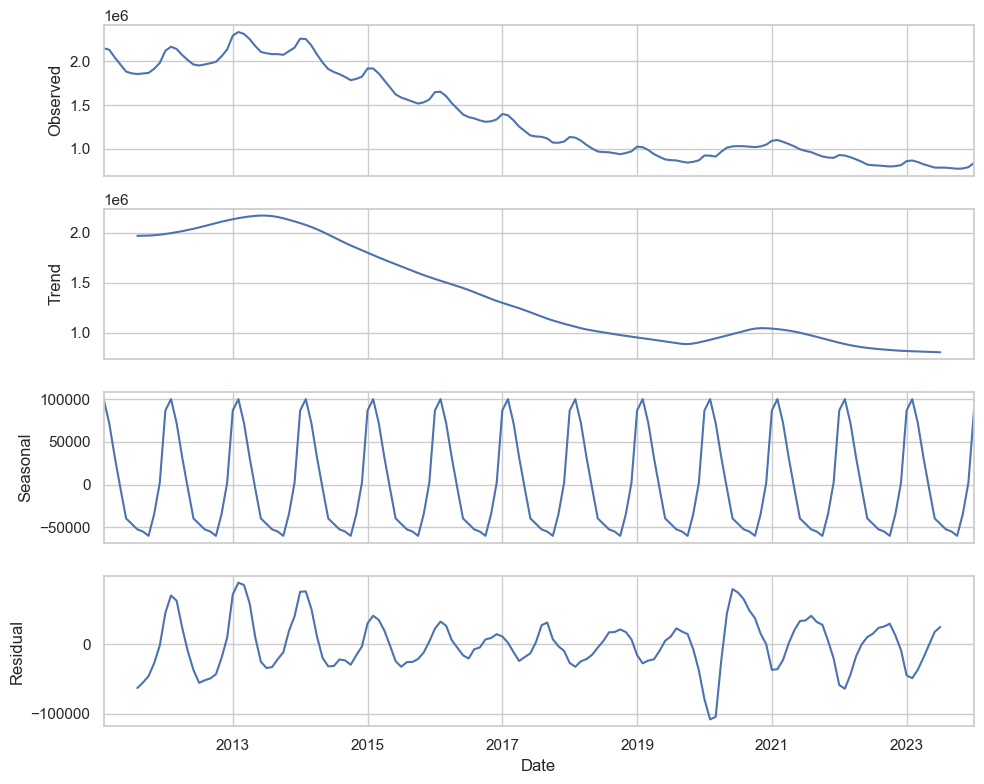

In [7]:
# Dekompozycja szeregu czasowego
from statsmodels.tsa.seasonal import seasonal_decompose

# Wykonanie dekompozycji
result = seasonal_decompose(df['Unemployed'], model='additive', period=12)  # okres = 12 dla danych miesięcznych

# Wizualizacja wyników
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


**Komentarz:**

- Zmienne wyrażone są w różnych jednostkach i mają różne skale
- Zmienna docelowa ma trend i sezonowość

### Stacjonarność szeregu

Sprawdzenie stacjonarności szeregu czasowego jest kluczowym krokiem w analizie szeregów czasowych. Stacjonarność oznacza, że statystyki (średnia, wariancja) szeregu czasowego nie zmieniają się w czasie. Jest to ważne, ponieważ wiele modeli analizy szeregów czasowych, takich jak modele ARIMA, zakłada stacjonarność danych.

W przypadku innych modeli takich jak regresja wielokrotna czy drzewa losowe, stacjonarność nie jest wymogiem, ale nadal może być ważna z kilku powodów:
- **Regresja wielokrotna:** Stacjonarność nie jest wymagana, ale jej brak może prowadzić do problemów z autokorelacją reszt i interpretacją wyników.
- **Drzewa decyzyjne i lasy losowe:** Modele te są bardziej odporne na niestacjonarność, ale nadal warto ją rozważyć, aby uzyskać stabilniejsze i bardziej ogólne wyniki.

Test Augmented Dickey-Fuller (ADF) jest jednym z najczęściej używanych testów do sprawdzania stacjonarności. Test ADF sprawdza hipotezę zerową, że szereg czasowy ma jednostkowy pierwiastek (czyli jest niestacjonarny). Hipoteza alternatywna mówi, że szereg jest stacjonarny.

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [9]:
# Przeprowadzenie testu ADF
result = adfuller(df['Unemployed'])

# Wyniki testu
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretacja wyników
if result[1] < 0.05:
    print("Odrzucamy hipotezę zerową. Szereg czasowy jest stacjonarny.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej. Szereg czasowy jest niestacjonarny.")

ADF Statistic: -1.2259700615470899
p-value: 0.6623254821686926
Critical Values: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
Nie ma podstaw do odrzucenia hipotezy zerowej. Szereg czasowy jest niestacjonarny.


**Interpretacja wyników:**

1. ADF Statistic

Im bardziej negatywna jest ta wartość, tym silniejszy dowód przeciwko hipotezie zerowej (która mówi, że szereg czasowy jest niestacjonarny).

2. p-value

Jeśli wartość p jest mniejsza niż wybrany poziom istotności (np. 0.05), możemy odrzucić hipotezę zerową i stwierdzić, że szereg czasowy jest stacjonarny.
W tym przypadku wartość p jest znacznie większa niż 0.05, co oznacza, że nie mamy wystarczających dowodów, aby odrzucić hipotezę zerową. W związku z tym szereg czasowy jest niestacjonarny.

3. Critical Values: Krytyczne wartości dla różnych poziomów istotności (1%, 5%, 10%).

Porównujemy statystykę ADF z krytycznymi wartościami. Jeśli statystyka ADF jest mniejsza (bardziej negatywna) niż krytyczna wartość, możemy odrzucić hipotezę zerową.
W tym przypadku, statystyka ADF (-1.2259700615470899) nie jest bardziej negatywna niż żadna z krytycznych wartości dla poziomów istotności 1%, 5% i 10%:
1%: -3.477261624048995
5%: -2.8821181874544233
10%: -2.5777431104939494

**Podsumowując:**

W związku z tym, nie możemy odrzucić hipotezy zerowej o niestacjonarności szeregu czasowego. Oznacza to, że zmienna *Unemployed* jest niestacjonarna. Aby uczynić ją stacjonarną, można zastosować techniki takie jak różnicowanie.

### Różnicowanie

Różnicowanie jest techniką przekształcania szeregu czasowego w celu uczynienia go stacjonarnym. Proces ten polega na obliczaniu różnic między kolejnymi wartościami szeregu czasowego. Różnicowanie pierwszego rzędu to różnica między wartością w czasie \( t \) a wartością w czasie \( t-1 \)

Cele różnicowania:

- Usunięcie trendu
- Uzyskanie stacjonarności

**Przykład różnicowania**

Jeśli mamy szereg czasowy:

\[ y = [3, 5, 8, 12, 18] \]

To różnicowanie pierwszego rzędu da:

\[ y' = [5 - 3, 8 - 5, 12 - 8, 18 - 12] = [2, 3, 4, 6] \]

Różnicowanie można przeprowadzać wielokrotnie (np. różnicowanie drugiego rzędu, które polega na różnicowaniu różnic), jeśli jedno różnicowanie nie uczyni szeregu stacjonarnym.


Szereg czasowy po różnicowaniu pierwszego rzędu:
ADF Statistic: -2.2395497468121413
p-value: 0.1922054715647708
Critical Values: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}

Szereg czasowy po różnicowaniu drugiego rzędu:
ADF Statistic: -4.374065385788078
p-value: 0.0003298241942308723
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}


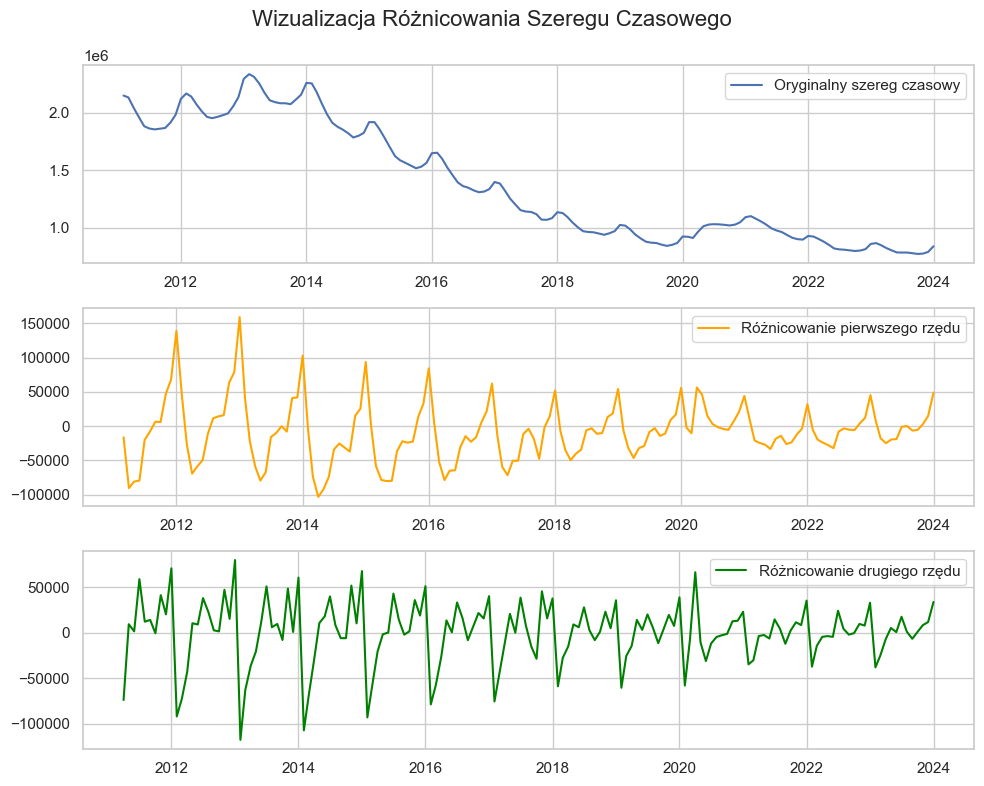

Odrzucamy hipotezę zerową. Szereg czasowy po różnicowaniu drugiego rzędu jest stacjonarny.


In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


# Wykonanie różnicowania pierwszego rzędu
df['data_diff1'] = df['Unemployed'].diff().dropna()

# Sprawdzenie stacjonarności po różnicowaniu pierwszego rzędu
result_diff1 = adfuller(df['data_diff1'].dropna())
print('Szereg czasowy po różnicowaniu pierwszego rzędu:')
print('ADF Statistic:', result_diff1[0])
print('p-value:', result_diff1[1])
print('Critical Values:', result_diff1[4])

# Jeśli szereg nadal jest niestacjonarny, wykonaj różnicowanie drugiego rzędu
if result_diff1[1] >= 0.05:
    df['data_diff2'] = df['data_diff1'].diff().dropna()

    # Sprawdzenie stacjonarności po różnicowaniu drugiego rzędu
    result_diff2 = adfuller(df['data_diff2'].dropna())
    print('\nSzereg czasowy po różnicowaniu drugiego rzędu:')
    print('ADF Statistic:', result_diff2[0])
    print('p-value:', result_diff2[1])
    print('Critical Values:', result_diff2[4])

    # Wykresy do wizualizacji
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))
    axes[0].plot(df['Unemployed'], label='Oryginalny szereg czasowy')
    axes[0].legend(loc='best')
    axes[1].plot(df['data_diff1'], label='Różnicowanie pierwszego rzędu', color='orange')
    axes[1].legend(loc='best')
    axes[2].plot(df['data_diff2'], label='Różnicowanie drugiego rzędu', color='green')
    axes[2].legend(loc='best')
    
    # Dodanie ogólnego tytułu
    fig.suptitle('Wizualizacja Różnicowania Szeregu Czasowego', fontsize=16)
    
    plt.tight_layout()
    plt.show()

    # Interpretacja wyników po różnicowaniu drugiego rzędu
    if result_diff2[1] < 0.05:
        print("Odrzucamy hipotezę zerową. Szereg czasowy po różnicowaniu drugiego rzędu jest stacjonarny.")
    else:
        print("Nie ma podstaw do odrzucenia hipotezy zerowej. Szereg czasowy po różnicowaniu drugiego rzędu jest niestacjonarny.")
else:
    print("Szereg czasowy jest stacjonarny po różnicowaniu pierwszego rzędu.")


**Komentarz:**

- Powyższa wizualizacja ma charakter poglądowy i pokazuje, jak wygląda szereg po różnicowaniu pierwszego i drugiego rzędu. W kodzie dodajemy kolumny pomocnicze data_diff1 i data_diff2. Właściwe różnicowanie zostanie wykonane w komórce poniżej.
- Dla zmiennej objaśnianej konieczne jest zastosowanie różnicowania drugiego rzędu.  
- Równie ważne jest uzyskanie stacjonarności zmiennych objaśniających.

**Ważne:**

Nie ma konieczności jednolitego różnicowania (1-go lub 2-go rzędu). Każda zmienna może wymagać innego rzędu różnicowania, w zależności od jej własnych właściwości.

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn.preprocessing import StandardScaler


def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05

def make_stationary(series):
    diff_series = series.diff().dropna()
    return diff_series

# Lista zmiennych objaśniających
explanatory_vars = df.columns.drop(['data_diff1', 'data_diff2'])


# Sprawdzenie stacjonarności zmiennych objaśniających i różnicowanie jeśli konieczne
for var in explanatory_vars:
    temp_series = df[var]
    diff_count = 0

    while not check_stationarity(temp_series) and diff_count < 2:
        temp_series = make_stationary(temp_series)
        diff_count += 1

    if not check_stationarity(temp_series):
        raise Exception(f"Zmienna {var} nie jest stacjonarna po różnicowaniu {diff_count} rzędu")

    df[f'{var}_diff'] = temp_series
    if diff_count > 0:
        print(f'Zmienna {var}:\tWykonano różnicowanie {diff_count} rzędu')
    else:
        print(f'Zmienna {var}:\tNie wykonano różnicowania.')

# Usunięcie pierwszych wierszy z brakującymi wartościami powstałymi po różnicowaniu
df.dropna(inplace=True)


Zmienna Unemployed:	Wykonano różnicowanie 2 rzędu
Zmienna Gold (Close):	Wykonano różnicowanie 1 rzędu
Zmienna USD (Close):	Wykonano różnicowanie 1 rzędu
Zmienna Oil (Close):	Wykonano różnicowanie 1 rzędu
Zmienna Tourists:	Wykonano różnicowanie 1 rzędu
Zmienna Cars:	Wykonano różnicowanie 1 rzędu
Zmienna ImportExport:	Wykonano różnicowanie 1 rzędu
Zmienna IndustryProd:	Nie wykonano różnicowania.
Zmienna CommerceInvest:	Nie wykonano różnicowania.
Zmienna Inflation:	Wykonano różnicowanie 1 rzędu


In [12]:
cols = ['Gold (Close)_diff',
       'USD (Close)_diff', 'Oil (Close)_diff', 'Tourists_diff', 'Cars_diff',
       'ImportExport_diff', 'IndustryProd', 'CommerceInvest',
       'Inflation_diff']
X = df[cols]
y = df['Unemployed_diff']

In [13]:
X

,Gold (Close)_diff,USD (Close)_diff,Oil (Close)_diff,Tourists_diff,Cars_diff,ImportExport_diff,IndustryProd,CommerceInvest,Inflation_diff
Date,,,,,,,,,
2011-04-01,-2.599976,-0.07300,3.279999,60056.0,1603.0,-1.74,106.5,19.3,0.2
2011-05-01,57.150024,-0.02820,-2.084999,496654.0,0.0,-4.24,107.9,17.0,0.5
2011-06-01,57.150024,-0.02820,-2.084999,248275.0,0.0,-1.74,102.5,20.0,-0.8
2011-07-01,-60.099976,-0.05200,-2.760002,217567.0,-5591.0,0.63,101.7,21.1,-0.1
2011-08-01,136.699951,0.08790,5.040001,-6550.0,0.0,2.89,107.7,18.2,0.2
...,...,...,...,...,...,...,...,...,...
2023-09-01,-0.899902,0.09400,3.639999,-627607.0,0.0,-7.24,96.7,4.9,-1.9
2023-10-01,19.500000,0.03925,-1.960003,-585371.0,12991.0,0.07,102.0,7.4,-1.6
2023-11-01,19.500000,0.03925,-1.960003,-456678.0,0.0,-0.97,99.7,4.9,0.0


**Komentarz:**

- Zmienna docelowa wymagała różnicowania 2-go rzędu
- Zmienne objaśniające nie wymagały różnicowania / wymagały różnicowania 1-go rzędu. 

### Standaryzacja zmiennych

Różnicowanie może zmienić skalę danych, dlatego ważne jest, aby wykonać standaryzację po różnicowaniu, aby dostosować dane do tej samej skali.

In [14]:
# Standaryzacja danych, aby ułatwić interpretację wyników
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modified = pd.DataFrame(X_scaled, columns=cols, index=df.index)
modified['target'] = y
modified

,Gold (Close)_diff,USD (Close)_diff,Oil (Close)_diff,Tourists_diff,Cars_diff,ImportExport_diff,IndustryProd,CommerceInvest,Inflation_diff,target
Date,,,,,,,,,,
2011-04-01,-0.126954,-0.789292,0.682746,0.122614,0.145119,-0.761692,0.277661,1.105237,0.307663,-74083.0
2011-05-01,0.995531,-0.345975,-0.358667,1.096367,-0.044229,-1.952658,0.481279,0.816347,0.760339,9471.0
2011-06-01,0.995531,-0.345975,-0.358667,0.542403,-0.044229,-0.761692,-0.304105,1.193161,-1.201257,1641.0
2011-07-01,-1.207170,-0.581487,-0.489693,0.473914,-0.704643,0.367343,-0.420458,1.331325,-0.145013,59164.0
2011-08-01,2.489985,0.802888,1.024384,-0.025938,-0.044229,1.443976,0.452190,0.967073,0.307663,12285.0
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,-0.095016,0.863251,0.752627,-1.411094,-0.044229,-3.381817,-1.147664,-0.703466,-2.861068,-6572.0
2023-10-01,0.288224,0.321474,-0.334403,-1.316894,1.490281,0.100567,-0.376825,-0.389455,-2.408392,976.0
2023-11-01,0.288224,0.321474,-0.334403,-1.029868,-0.044229,-0.394875,-0.711340,-0.703466,0.005879,8498.0


**Komentarz:**

Nie standaryzujemy zmiennej docelowej, jedynie zmienne objaśniające.

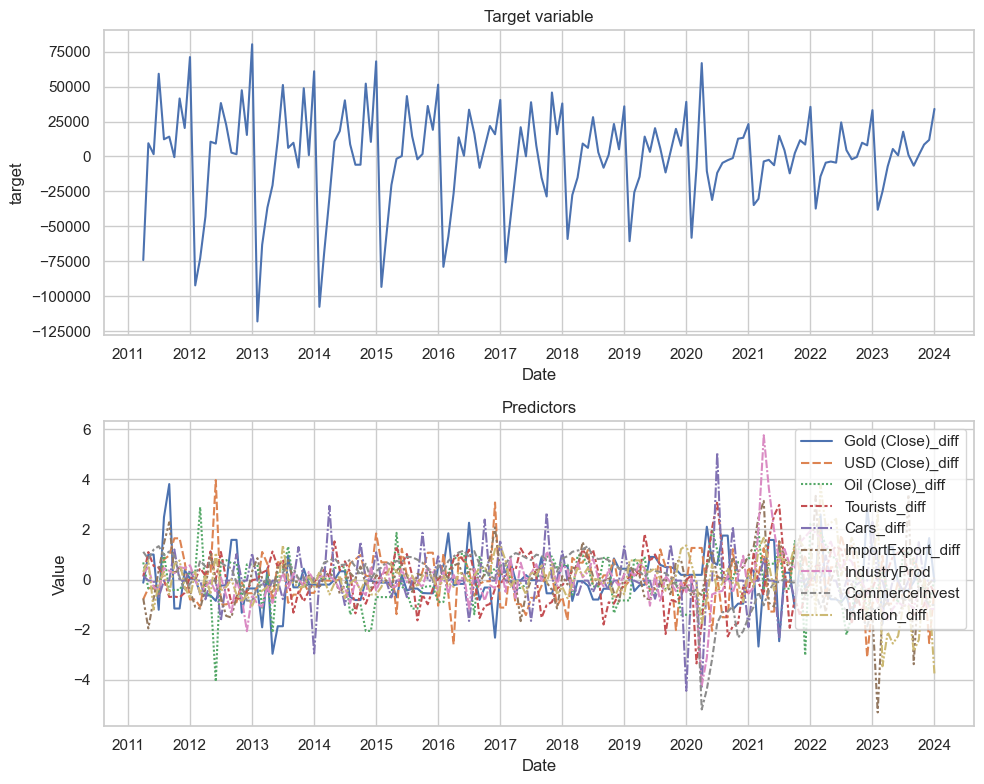

In [15]:
# Wizualizacja danych, aby zrozumieć podstawowe wzorce i trendy
fig, ax = plt.subplots(2,1, figsize=[10, 8])
sns.lineplot(modified['target'], ax=ax[0])
sns.lineplot(modified.drop('target', axis=1), ax=ax[1])

years = mdates.YearLocator()
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_ylabel('Value')
ax[0].set_title('Target variable')
ax[1].set_title('Predictors')

plt.tight_layout()
plt.show()

**Komentarz:**

Różnicowanie szeregu czasowego prowadzi do usunięcia pierwotnych wartości i zależności między nimi. Przy różnicowaniu tracimy informacje o absolutnych wartościach i zmianach w szeregu czasowym, co może utrudnić interpretację wykresu oraz analizę danych.

# Wykorzystanie ACF i PACF

Wykresy ACF (Autocorrelation Function) i PACF (Partial Autocorrelation Function) są narzędziami wykorzystywanymi do analizy korelacji między kolejnymi obserwacjami w szeregu czasowym. 

- Wykres ACF pokazuje autokorelację między wartościami w różnych opóźnieniach
- Wykres PACF pokazuje autokorelację między wartościami po uwzględnieniu wpływu opóźnień pośrednich.

Są one używane do identyfikacji opóźnień w szeregu czasowym, które można uwzględnić w modelowaniu i prognozowaniu.

**Cel:** 

Celem jest wykorzystanie wykresów ACF i PACF dla poziomu bezrobocia i pozostałych zmiennych, aby zidentyfikować istotne lagowe wartości.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
def plot_acf_pacf(data, variable, lags=20):
    """
    Generuje wykresy ACF i PACF dla zadanej zmiennej.
    
    Parameters:
    data (DataFrame): Ramka danych zawierająca szereg czasowy.
    variable (str): Nazwa zmiennej do analizy.
    lags (int): Liczba lagów do wyświetlenia na wykresach.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Wykres ACF
    plot_acf(data[variable], lags=lags, ax=ax[0])
    ax[0].set_title(f'ACF of {variable}')
    ax[0].set_xlabel('Lag')
    ax[0].set_ylabel('ACF')

    # Wykres PACF
    plot_pacf(data[variable], lags=lags, ax=ax[1])
    ax[1].set_title(f'PACF of {variable}')
    ax[1].set_xlabel('Lag')
    ax[1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()

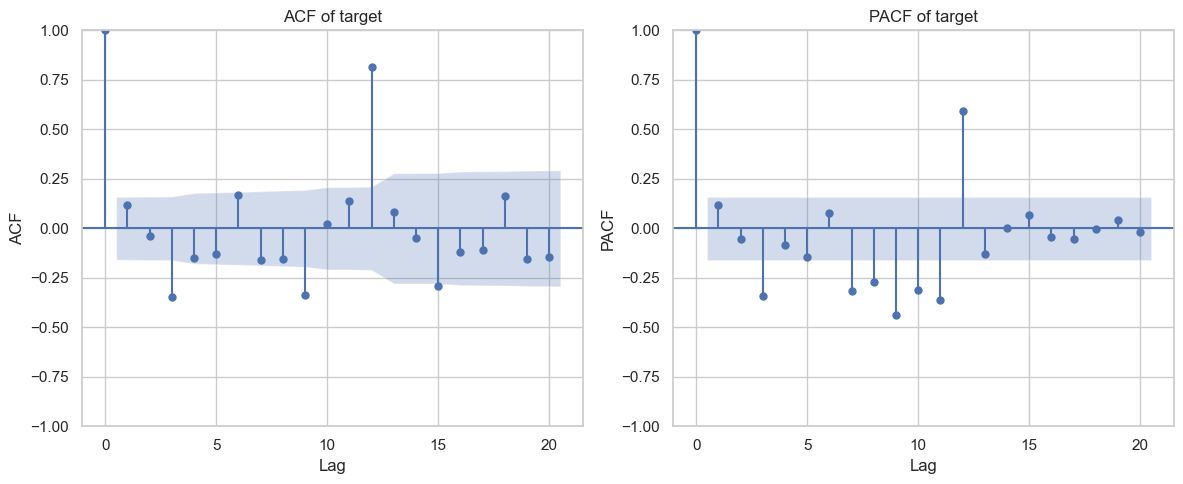

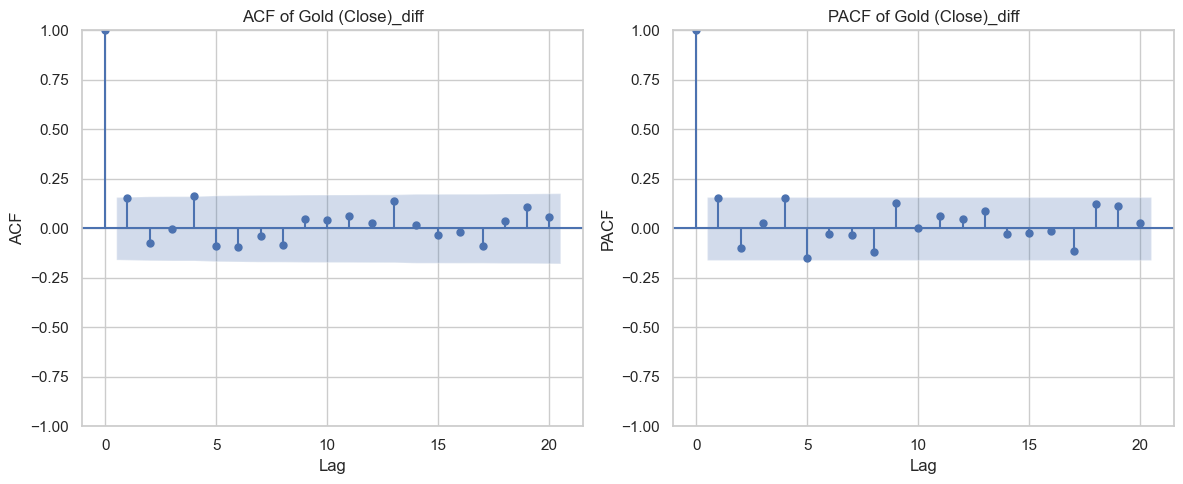

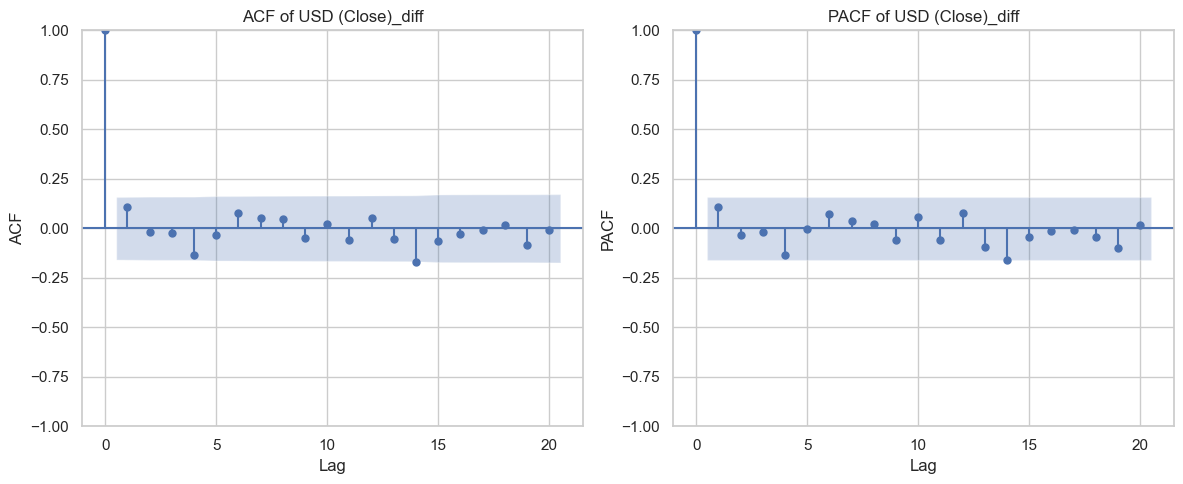

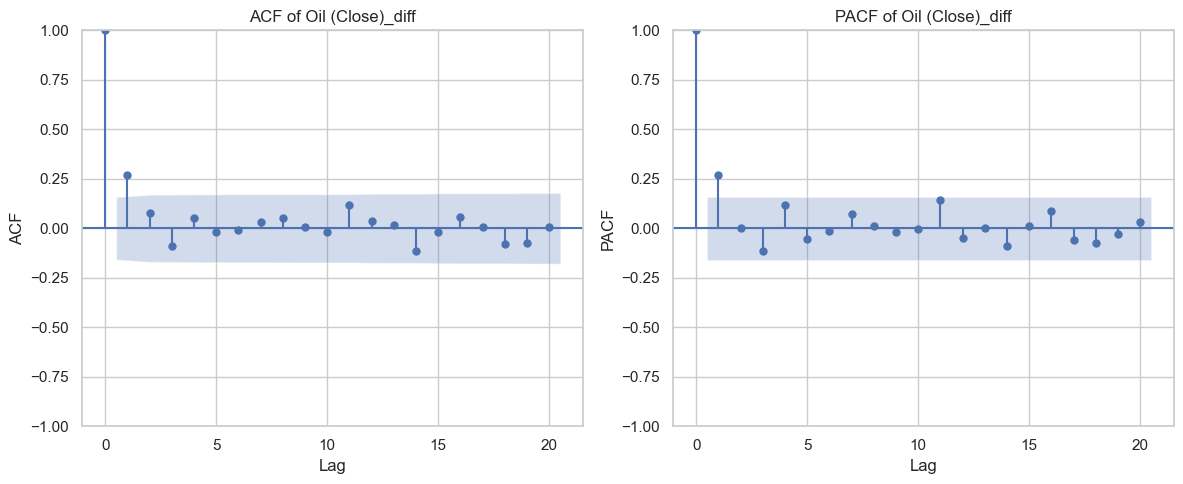

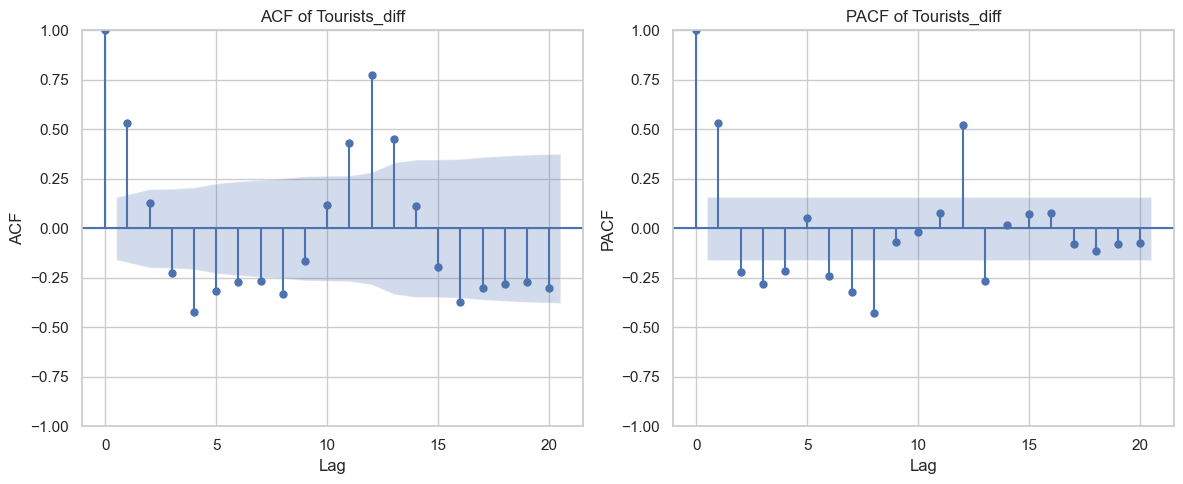

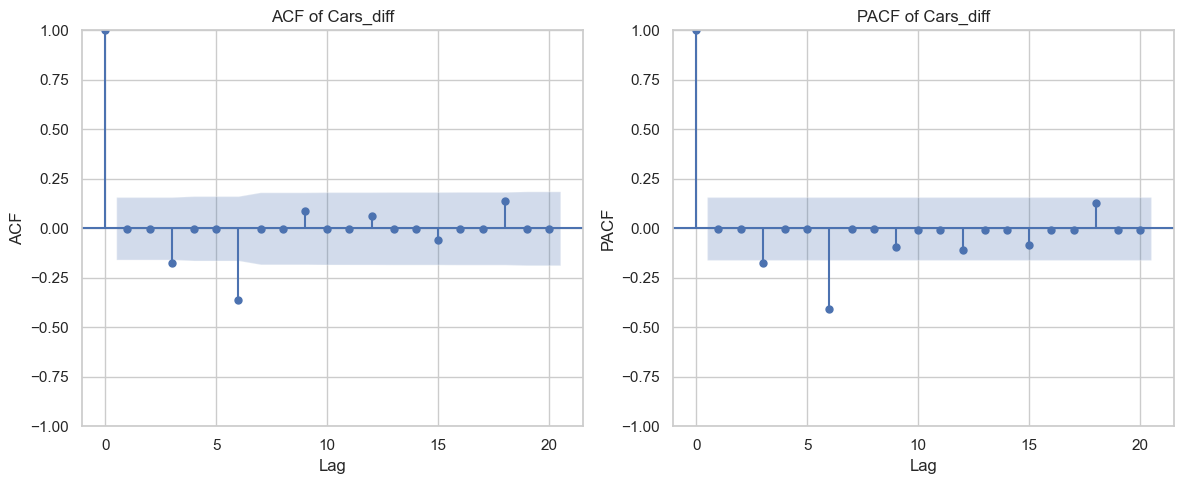

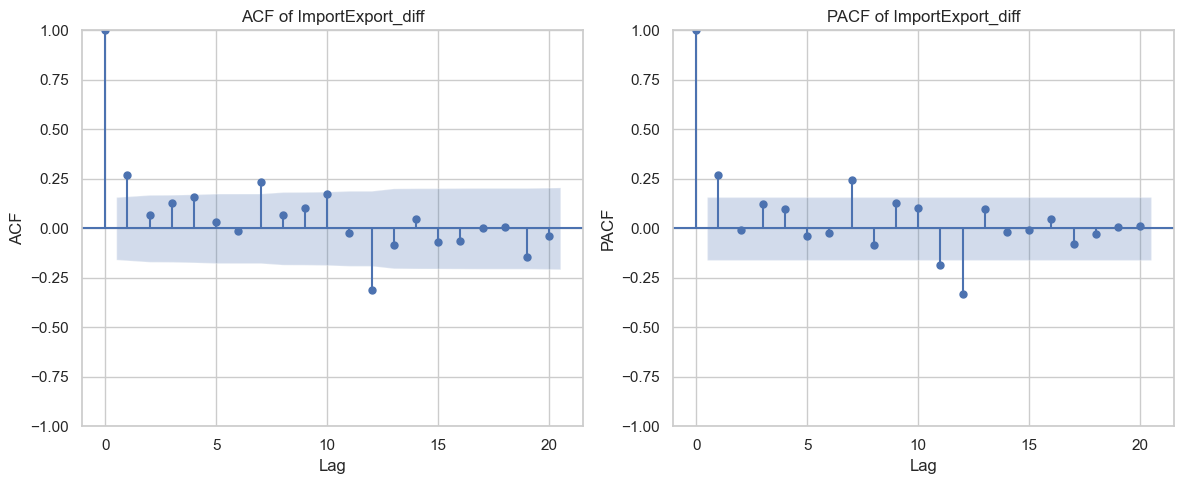

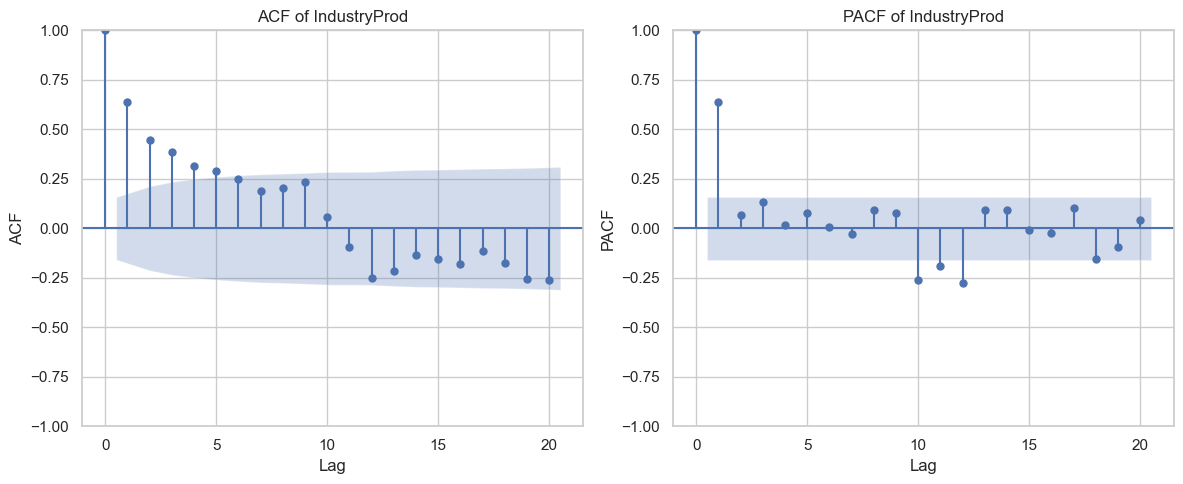

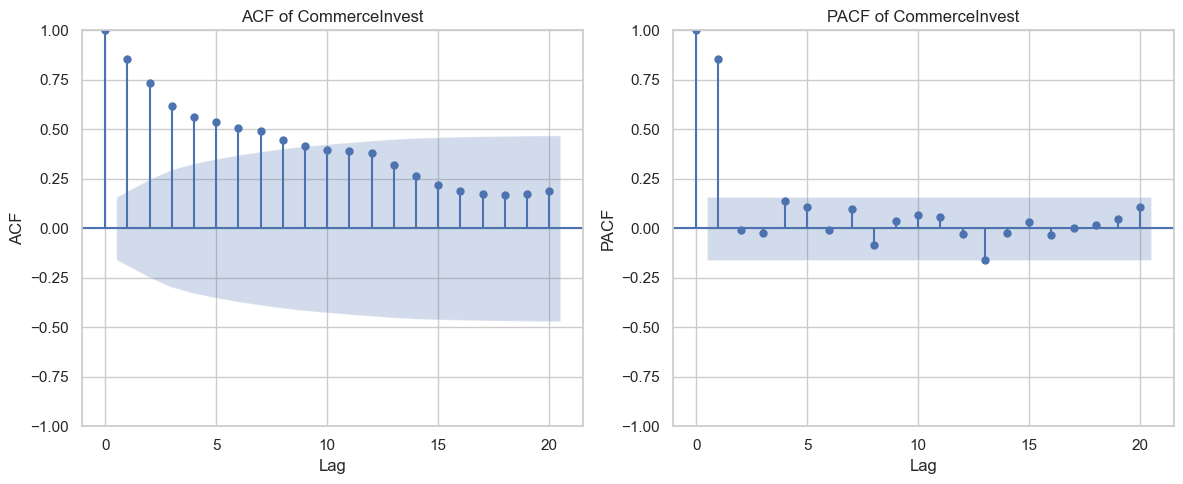

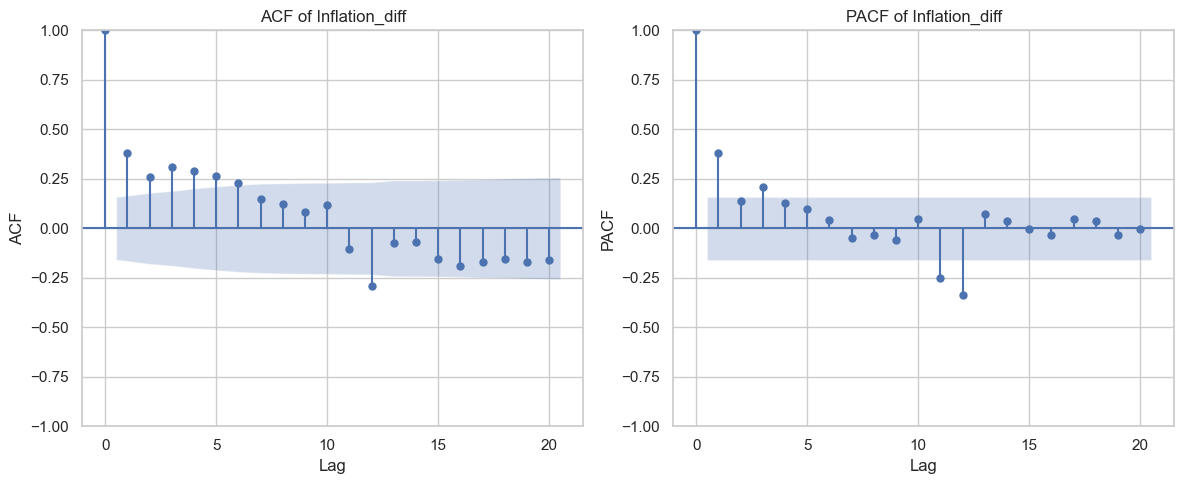

In [18]:
explanatory_variables = modified.columns.drop('target')

# Wygenerowanie wykresów ACF i PACF dla zmiennej docelowej
plot_acf_pacf(modified, 'target')

# Wygenerowanie wykresów ACF i PACF dla zmiennych objaśniających
for var in explanatory_variables:
    plot_acf_pacf(modified, var)

**Interpretacja dla zmiennej target:**

ACF:

Istotne opóźnienia (lag 3, 9, 12) w ACF mogą wskazywać na powtarzające się wzorce w tych punktach.

PACF:

Istotne opóźnienia (lag 3, 7, 8, 9, 10, 11, 12) w PACF mogą sugerować bardziej bezpośredni wpływ tych opóźnień na wartości w szeregu czasowym.

In [19]:
# Istotne opóźnienia wskazane przez ACF, PACF
lags_dict = {
    'target': [3, 7, 8, 9, 10, 11, 12],
    'Oil (Close)_diff': [1],
    'Tourists_diff': [1, 2, 3, 4, 6, 7, 8, 11, 12],
    'Cars_diff': [6],
    'ImportExport_diff': [12],
    'IndustryProd': [1, 2, 3, 4, 5, 10, 11, 12],
    'CommerceInvest': [1],
    'Inflation_diff': [1, 2, 3, 4, 5, 11, 12]
}

### Tworzenie zmiennych opóźnionych

In [20]:
# Tworzenie zmiennych opóźnionych na podstawie zidentyfikowanych lagów
for var, lags in lags_dict.items():
    for lag in lags:
        modified[f'{var}_lag{lag}'] = modified[var].shift(lag)

# Sprawdzenie korelacji zmiennych z opóźnieniem z poziomem bezrobocia
correlations = modified.corr()['target'].dropna()
print(correlations)

Gold (Close)_diff         -0.014045
USD (Close)_diff           0.032748
Oil (Close)_diff          -0.117513
Tourists_diff             -0.082948
Cars_diff                 -0.143211
ImportExport_diff          0.022047
IndustryProd              -0.060815
CommerceInvest            -0.068880
Inflation_diff            -0.075276
target                     1.000000
target_lag3               -0.354854
target_lag7               -0.165093
target_lag8               -0.159997
target_lag9               -0.350586
target_lag10               0.023208
target_lag11               0.151659
target_lag12               0.903591
Oil (Close)_diff_lag1     -0.119857
Tourists_diff_lag1        -0.108027
Tourists_diff_lag2        -0.049414
Tourists_diff_lag3         0.139714
Tourists_diff_lag4         0.164612
Tourists_diff_lag6         0.356146
Tourists_diff_lag7        -0.088276
Tourists_diff_lag8        -0.145514
Tourists_diff_lag11       -0.069895
Tourists_diff_lag12       -0.012155
Cars_diff_lag6            -0

**Komentarz:**

Względnie wysoka korelacja ze zmienną target:

- Oil (Close)_diff
- Tourists_diff
- Cars_diff
- Zmienne opóźnione target
- Zmienne opóźnione Tourists
- Zmienna opóźniona Oil (Close)_diff

In [59]:
# Sprawdzenie korelacji zmiennych z opóźnieniem z poziomem bezrobocia
correlations_spearman = modified.corr(method="spearman")['target'].dropna()
print(correlations_spearman)

Gold (Close)_diff         -0.037839
USD (Close)_diff          -0.018746
Oil (Close)_diff          -0.109020
Tourists_diff             -0.095808
Cars_diff                 -0.126993
ImportExport_diff          0.014223
IndustryProd              -0.025147
CommerceInvest             0.010545
Inflation_diff            -0.095934
target                     1.000000
target_lag3               -0.428240
target_lag7               -0.077364
target_lag8               -0.177932
target_lag9               -0.411030
target_lag10              -0.043333
target_lag11               0.197926
target_lag12               0.838333
Oil (Close)_diff_lag1     -0.063247
Tourists_diff_lag1        -0.128342
Tourists_diff_lag2        -0.109388
Tourists_diff_lag3         0.072022
Tourists_diff_lag4         0.200452
Tourists_diff_lag6         0.459041
Tourists_diff_lag7         0.025282
Tourists_diff_lag8        -0.133819
Tourists_diff_lag11       -0.115056
Tourists_diff_lag12       -0.048846
Cars_diff_lag6            -0

**Komentarz:**

# TODO

# Regresja wieloraka

### Selekcja wsteczna

Selekcja wsteczna zostanie wykonana za pomocą metody Recursive Feature Elimination (RFE), która polega na iteracyjnym usuwaniu najmniej istotnych cech z modelu. Proces ten kontynuuje się aż do osiągnięcia oczekiwanej liczby cech do wyboru.

**Uwagi:**

Głównym celem projektu jest identyfikacja istotnych zmiennych wpływających na poziom bezrobocia i ich zrozumienie, a niekoniecznie budowa modelu do prognozowania. Dlatego też zdecydowano się zrezygnować z podziału zbioru danych na zbiory treningowy i testowy.

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Definiujemy X (zmienne objaśniające) i y (zmienna docelowa)
X = modified[modified.columns.drop('target')].dropna()
y = modified['target'].loc[X.index]


In [23]:
# Regresja wieloraka

# Dodanie stałej do zmiennych objaśniających (potrzebne do modelu OLS)
X = sm.add_constant(X)

# Dopasowanie modelu najmniejszych kwadratów (OLS)
model_all = sm.OLS(y, X).fit()

# Wyświetlenie wyników
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     26.58
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           4.79e-38
Time:                        22:12:04   Log-Likelihood:                -1495.5
No. Observations:                 142   AIC:                             3081.
Df Residuals:                      97   BIC:                             3214.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Poniżej znajdują się podsumowania modeli z określoną liczbą cech: 5, 10

In [24]:
# Definiowanie regresora liniowego
lr = LinearRegression()

# Inicjalizacja RFE z regresorem i liczba wybranych zmiennych
selector = RFE(lr, n_features_to_select=5, step=1)  

# Dopasowanie RFE
selector = selector.fit(X, y)

# Wybrane zmienne
selected_columns_back1 = X.columns[selector.support_]

print("Selected features:", selected_columns_back1)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_columns_back1]
model_back1 = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_back1.summary())


Selected features: Index(['Cars_diff', 'CommerceInvest', 'Tourists_diff_lag6',
       'Tourists_diff_lag7', 'CommerceInvest_lag1'],
      dtype='object')
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.273
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              10.31
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                    2.08e-08
Time:                        22:12:04   Log-Likelihood:                         -1655.3
No. Observations:                 142   AIC:                                      3321.
Df Residuals:                     137   BIC:                                      3335.
Df Model:                           5                                                  
Covariance Type:            nonrobust                 

In [25]:
# Definiowanie regresora liniowego
lr = LinearRegression()

# Inicjalizacja RFE z regresorem i liczba wybranych zmiennych
selector = RFE(lr, n_features_to_select=10, step=1)  

# Dopasowanie RFE
selector = selector.fit(X, y)

# Wybrane zmienne
selected_columns_back2 = X.columns[selector.support_]

print("Selected features:", selected_columns_back2)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_columns_back2]
model_back2 = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_back2.summary())


Selected features: Index(['Cars_diff', 'CommerceInvest', 'Tourists_diff_lag3',
       'Tourists_diff_lag4', 'Tourists_diff_lag6', 'Tourists_diff_lag7',
       'Cars_diff_lag6', 'IndustryProd_lag4', 'CommerceInvest_lag1',
       'Inflation_diff_lag3'],
      dtype='object')
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.329
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              6.472
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                    4.45e-08
Time:                        22:12:04   Log-Likelihood:                         -1649.6
No. Observations:                 142   AIC:                                      3319.
Df Residuals:                     132   BIC:                                      3349.
Df Model:             

### Selekcja do przodu

Selekcja do przodu to technika wyboru cech, która iteracyjnie dodaje cechy do modelu na podstawie ich wpływu na wydajność modelu, zaczynając od pustego modelu i dodając cechy, które najbardziej poprawiają jego wydajność

In [42]:
def forward_selection(data, target, significance_level=0.05):
    """
    Przeprowadza selekcję do przodu dla modelu regresji liniowej.
    
    Parameters:
    data (DataFrame): Ramka danych zawierająca zmienne objaśniające.
    target (Series): Zmienna docelowa.
    significance_level (float): Poziom istotności do dodawania zmiennych.

    Returns:
    list: Lista wybranych zmiennych.
    """
    initial_features = []
    remaining_features = list(data.columns)
    selected_features = initial_features[:]
    while remaining_features:
        remaining_pvalues = []
        for feature in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[selected_features + [feature]])).fit()
            remaining_pvalues.append((feature, model.pvalues[feature]))
        
        best_feature, best_pvalue = min(remaining_pvalues, key=lambda x: x[1])
        
        if best_pvalue < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features


In [43]:
# Wykonanie selekcji do przodu
selected_features_for1 = forward_selection(X, y)
print("Selected features:", selected_features_for1)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_features_for1]
X_selected = sm.add_constant(X_selected)  # Dodanie stałej
model_for1 = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_for1.summary())


Selected features: ['target_lag12', 'Cars_diff', 'IndustryProd_lag2', 'IndustryProd', 'USD (Close)_diff']
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           9.38e-60
Time:                        22:17:35   Log-Likelihood:                -1529.9
No. Observations:                 142   AIC:                             3072.
Df Residuals:                     136   BIC:                             3089.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [28]:
# Wykonanie selekcji do przodu
selected_features_for2 = forward_selection(X, y, 0.10)
print("Selected features:", selected_features_for2)

# Dopasowanie modelu z wybranymi zmiennymi
X_selected = X[selected_features_for2]
X_selected = sm.add_constant(X_selected)  # Dodanie stałej
model_for2 = sm.OLS(y, X_selected).fit()

# Wyświetlenie wyników
print(model_for2.summary())


Selected features: ['target_lag12', 'Cars_diff', 'IndustryProd_lag2', 'IndustryProd', 'USD (Close)_diff', 'CommerceInvest_lag1', 'CommerceInvest', 'Inflation_diff_lag1', 'Cars_diff_lag6', 'Inflation_diff_lag4', 'IndustryProd_lag1', 'IndustryProd_lag4']
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     98.15
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           9.61e-59
Time:                        22:12:07   Log-Likelihood:                -1513.5
No. Observations:                 142   AIC:                             3053.
Df Residuals:                     129   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobus

In [29]:
results_df = pd.DataFrame(columns=['rsqured', 'fvalue', 'f_pvalue', 'selected_features'], index=['model_back1', 'model_back2', 'model_for1', 'model_for2'])

results_df.loc['model_back1'] = [model_back1.rsquared, model_back1.fvalue, model_back1.f_pvalue, list(selected_columns_back1)]
results_df.loc['model_back2'] = [model_back2.rsquared, model_back2.fvalue, model_back2.f_pvalue, list(selected_columns_back2)]
results_df.loc['model_for1'] = [model_for1.rsquared, model_for1.fvalue, model_for1.f_pvalue, selected_features_for1]
results_df.loc['model_for2'] = [model_for2.rsquared, model_for2.fvalue, model_for2.f_pvalue, selected_features_for2]

pd.set_option('display.max_colwidth', None)
display(results_df)

,rsqured,fvalue,f_pvalue,selected_features
model_back1,0.273452,10.312602,0.0,"[Cars_diff, CommerceInvest, Tourists_diff_lag6, Tourists_diff_lag7, CommerceInvest_lag1]"
model_back2,0.32901,6.472431,0.0,"[Cars_diff, CommerceInvest, Tourists_diff_lag3, Tourists_diff_lag4, Tourists_diff_lag6, Tourists_diff_lag7, Cars_diff_lag6, IndustryProd_lag4, CommerceInvest_lag1, Inflation_diff_lag3]"
model_for1,0.875715,191.652259,0.0,"[target_lag12, Cars_diff, IndustryProd_lag2, IndustryProd, USD (Close)_diff]"
model_for2,0.901285,98.149324,0.0,"[target_lag12, Cars_diff, IndustryProd_lag2, IndustryProd, USD (Close)_diff, CommerceInvest_lag1, CommerceInvest, Inflation_diff_lag1, Cars_diff_lag6, Inflation_diff_lag4, IndustryProd_lag1, IndustryProd_lag4]"


**Komentarz:**

# TODO
które zmienne się powtarzają, co można wywnioskowć

# Drzewa decyzyjne

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
explanatory_cols = [col for col in modified.columns if col != 'target']

# Definiujemy X (zmienne objaśniające) i y (zmienna docelowa)
X = modified[modified.columns.drop('target')].dropna()
y = modified['target'].loc[X.index]

# Podział danych na zestaw treningowy i testowy
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
explanatory_cols = modified.columns.drop('target')

# Inicjalizacja modelu drzewa decyzyjnego
tree_model = DecisionTreeRegressor(random_state=42)

# Trenowanie modelu na danych treningowych
tree_model.fit(X, y)

# Ocenianie ważności zmiennych
importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': explanatory_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Importance of features (Decision Tree):\n", feature_importance_df)


Importance of features (Decision Tree):
                     Feature    Importance
15             target_lag12  7.632607e-01
14             target_lag11  7.799954e-02
7            CommerceInvest  2.845846e-02
20       Tourists_diff_lag4  2.689230e-02
5         ImportExport_diff  1.725005e-02
10              target_lag7  1.471884e-02
36      CommerceInvest_lag1  1.275422e-02
3             Tourists_diff  9.345508e-03
9               target_lag3  8.808760e-03
0         Gold (Close)_diff  5.211249e-03
19       Tourists_diff_lag3  4.421977e-03
18       Tourists_diff_lag2  4.327323e-03
28        IndustryProd_lag1  4.105431e-03
6              IndustryProd  3.907246e-03
32        IndustryProd_lag5  3.499951e-03
35       IndustryProd_lag12  2.682980e-03
13             target_lag10  2.542708e-03
41      Inflation_diff_lag5  1.529832e-03
30        IndustryProd_lag3  1.414385e-03
38      Inflation_diff_lag2  1.352319e-03
24      Tourists_diff_lag11  1.089554e-03
39      Inflation_diff_lag3  8.7714

In [33]:
# Las losowy

# Inicjalizacja modelu lasu losowego
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu na danych treningowych
forest_model.fit(X, y)

# Ocenianie ważności zmiennych
importances = forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': explanatory_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Importance of features (Random Forest):\n", feature_importance_df)


Importance of features (Random Forest):
                     Feature  Importance
15             target_lag12    0.787791
13             target_lag10    0.028713
14             target_lag11    0.026449
20       Tourists_diff_lag4    0.016538
4                 Cars_diff    0.009679
10              target_lag7    0.009285
5         ImportExport_diff    0.008862
7            CommerceInvest    0.008460
17       Tourists_diff_lag1    0.007454
25      Tourists_diff_lag12    0.005448
22       Tourists_diff_lag7    0.005173
6              IndustryProd    0.004890
2          Oil (Close)_diff    0.004880
9               target_lag3    0.004736
18       Tourists_diff_lag2    0.004623
26           Cars_diff_lag6    0.004407
0         Gold (Close)_diff    0.004060
19       Tourists_diff_lag3    0.004008
34       IndustryProd_lag11    0.003575
32        IndustryProd_lag5    0.003562
23       Tourists_diff_lag8    0.003137
29        IndustryProd_lag2    0.003107
35       IndustryProd_lag12    0.002987

# Wyjaśnienie za pomocą SHAP

SHAP (SHapley Additive exPlanations) to technika wyjaśniania modeli maszynowego uczenia się, która opiera się na teorii gier i rachunku Shapleya. 

SHAP jest narzędziem służącym do interpretacji predykcji modelu, co pozwala zrozumieć, jak każda zmienna lub cecha przyczynia się do ostatecznych wyników predykcji. Dzięki SHAP możliwe jest zbadanie wpływu poszczególnych zmiennych na model, zarówno globalnie, jak i lokalnie.

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
import shap

def plot_shap_summary(model, X_selected, plot_type='summary'):
    """
    Wyświetla podsumowanie SHAP dla danego modelu i danych wejściowych.

    Parameters:
    model (callable): Model, który może być wywoływany do predykcji.
    X_selected (pandas.DataFrame): Dane wejściowe, które będą analizowane.
    plot_type (str, optional): Typ wykresu SHAP. Dostępne opcje to 'summary' (domyślne) i 'bar'.

    Returns:
    None
    """
    # Inicjalizacja Explainera SHAP z wytrenowanym modelem
    explainer = shap.Explainer(model, X_selected)

    # Obliczanie wartości SHAP dla każdej obserwacji
    shap_values = explainer(X_selected)

    # Wybór typu wykresu SHAP
    if plot_type == 'summary':
        shap.summary_plot(shap_values, X_selected)
    elif plot_type == 'bar':
        shap.summary_plot(shap_values, X_selected, plot_type='bar')
    else:
        raise ValueError("Nieprawidłowy typ wykresu SHAP. Dostępne opcje to 'summary' i 'bar'.")


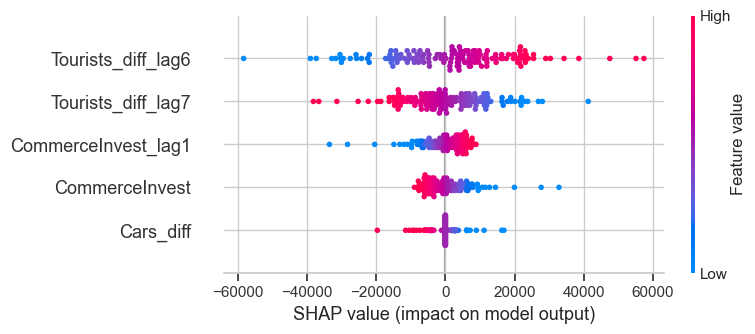

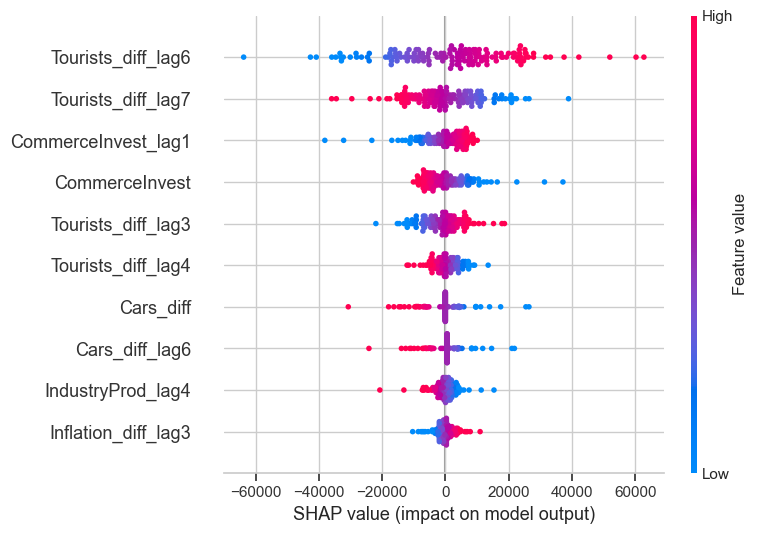

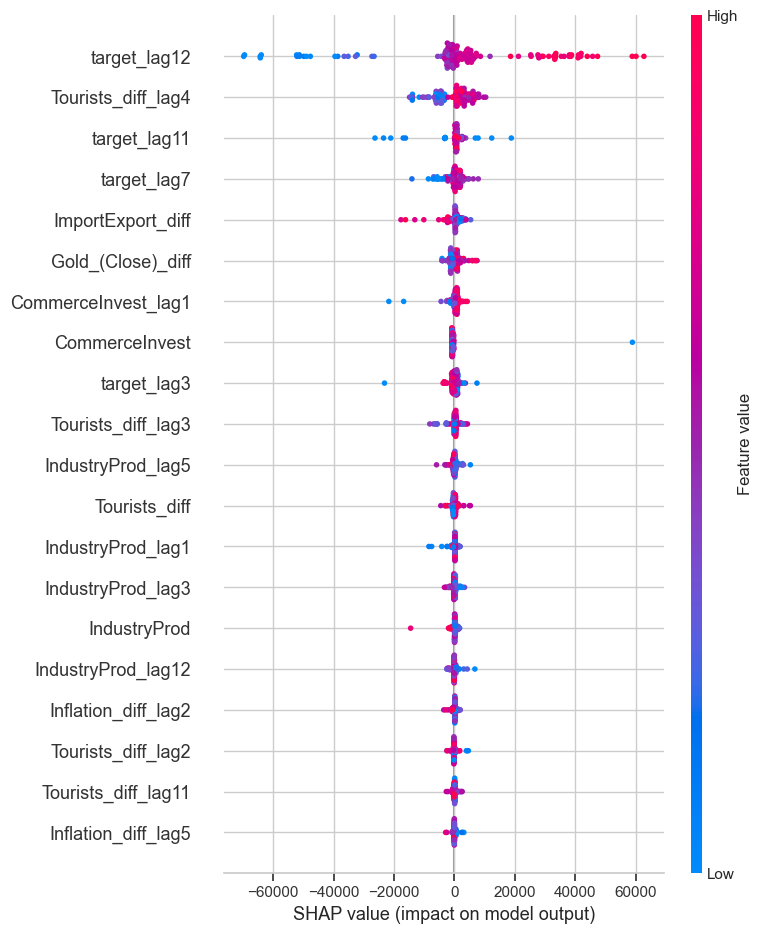

In [57]:
plot_shap_summary(model_back1.predict, X[selected_columns_back1])
plot_shap_summary(model_back2.predict, X[selected_columns_back2])
plot_shap_summary(tree_model, X)

# plot_shap_summary(model_for1.predict, X[selected_features_for2])
# plot_shap_summary(model_for2.predict, X[selected_features_for2])
#plot_shap_summary(forest_model, X)

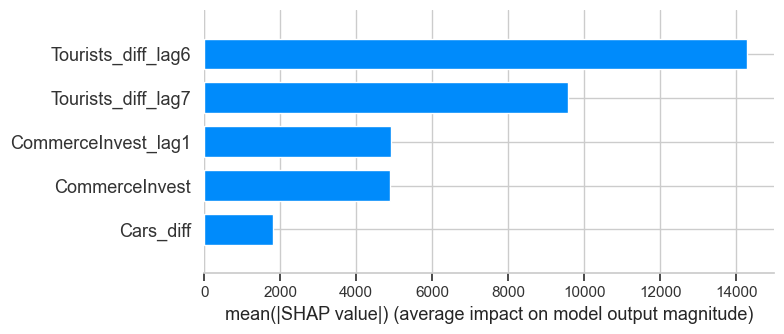

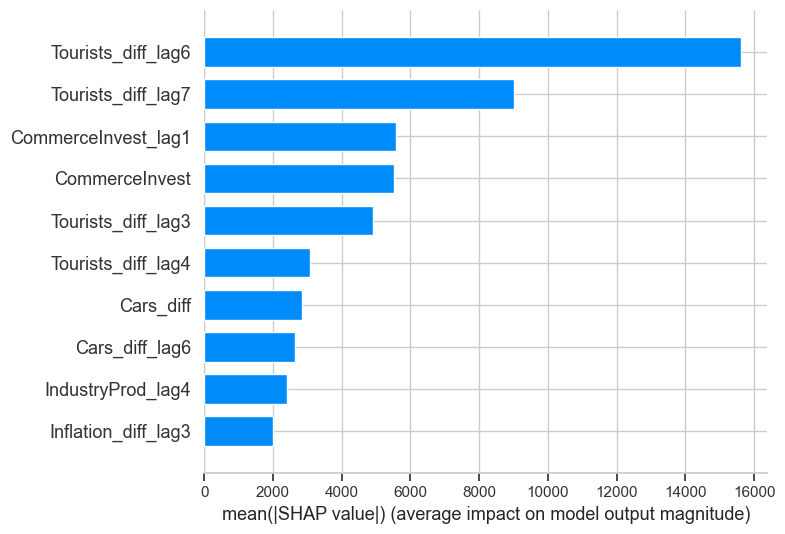

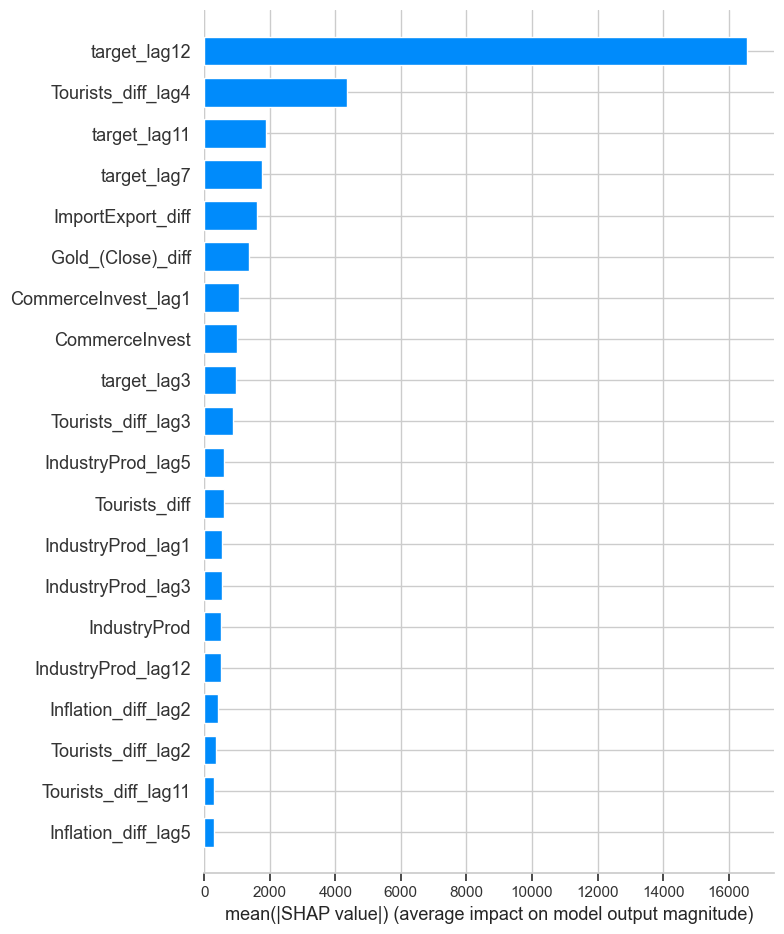

In [58]:
plot_shap_summary(model_back1.predict, X[selected_columns_back1], plot_type="bar")
plot_shap_summary(model_back2.predict, X[selected_columns_back2], plot_type="bar")
plot_shap_summary(tree_model, X, plot_type="bar")

# plot_shap_summary(model_for1.predict, X[selected_features_for2])
# plot_shap_summary(model_for2.predict, X[selected_features_for2])
#plot_shap_summary(forest_model, X)

# Wnioski

# TODO

- Sformułowanie celu projektu
- Jakie badania przeprowadzono
- Hipotezy badawcze (np. powiązanie okresu letniego w turystyce z mniejszym bezrobociem etc.)
- Wyniki analizy i identyfikacja kluczowych czynników wpływających na poziom bezrobocia
